# Package testing

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imload(fpath):
    return cv2.cvtColor(cv2.imread(fpath), cv2.COLOR_BGR2RGB)

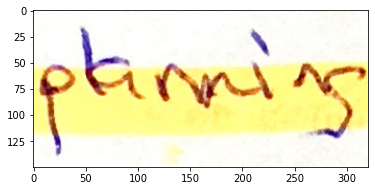

In [3]:
test = "../data-sources/spanish-words-mini/w124_rgb_15.png"
image = imload(test)
plt.imshow(image)

## `preprocessing` pkg

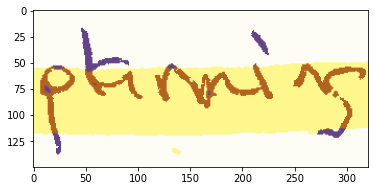

In [5]:
from preproc import Quantize

quantized_image = Quantize.reduce_palette(image, 4)
plt.imshow(quantized_image)

Wall time: 3.44 s


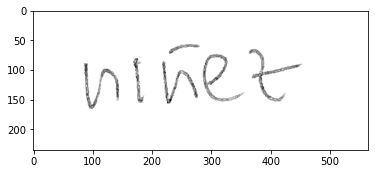

In [3]:
%%time
from preproc import RobustBinarize

bin_image = RobustBinarize.illumination_compensation(image)
plt.imshow(bin_image, cmap="gray")

Wall time: 38.9 ms


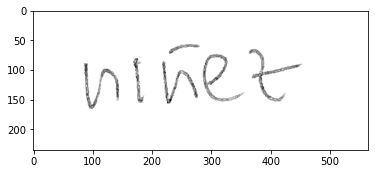

In [4]:
%%time
from preproc import RobustBinarize

bin_image = RobustBinarize.illumination_compensation(image)
plt.imshow(bin_image, cmap="gray")

Wall time: 328 ms


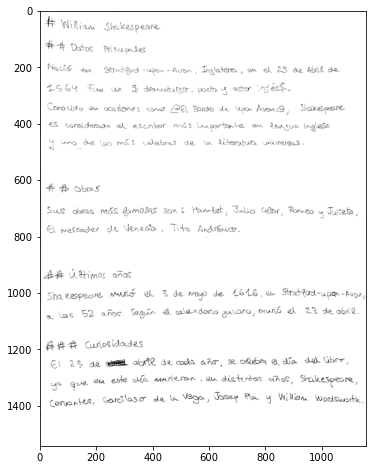

In [5]:
%%time
test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = RobustBinarize.imread(test)

bin_image = RobustBinarize.illumination_compensation(image)
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.33 s


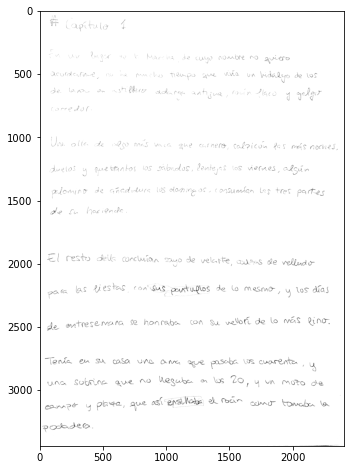

In [12]:
%%time
test = "../data-sources/spanish-words-originals/test1.jpg"
image = RobustBinarize.imread(test)

bin_image = RobustBinarize.illumination_compensation(image)
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.47 s


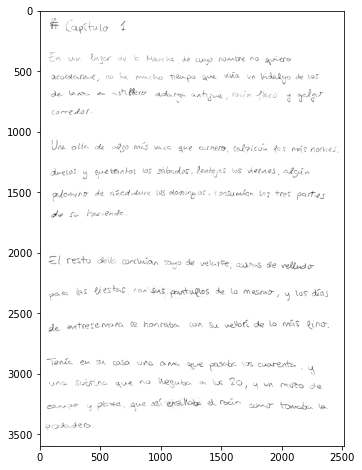

In [13]:
%%time
test = "../data-sources/spanish-words-originals/test2.jpg"
image = RobustBinarize.imread(test)

bin_image = RobustBinarize.illumination_compensation(image)
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 800 ms


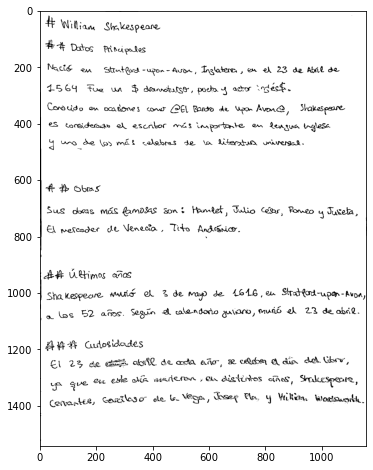

In [6]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=23)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.21 s


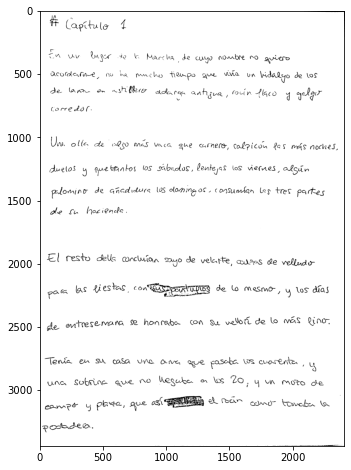

In [10]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test1.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=23)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.3 s


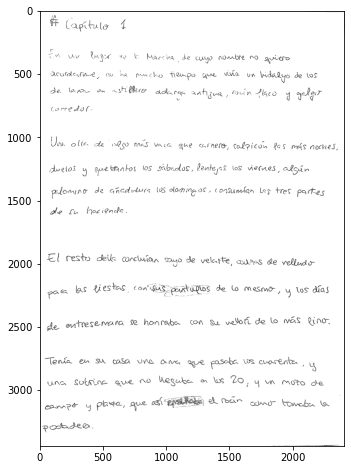

In [11]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test1.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=7)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.4 s


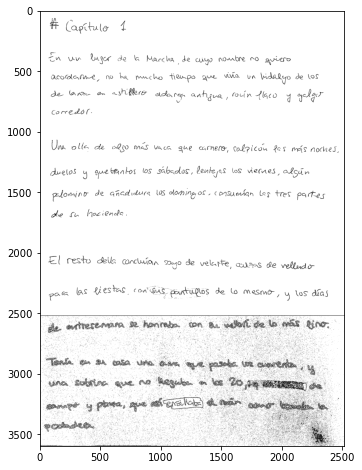

In [14]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test2.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=7)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 1.43 s


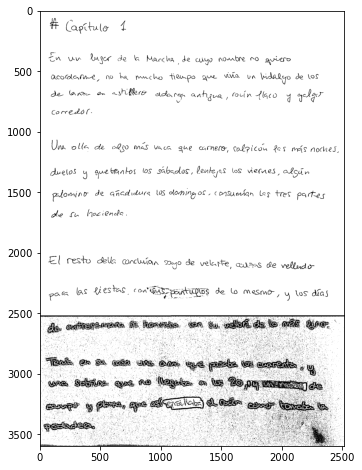

In [15]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test2.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=21)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

Wall time: 330 ms


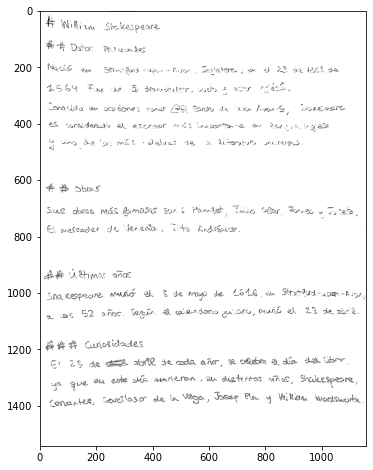

In [8]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=3)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

In [2]:
from preproc import ColorGroup

new_color = np.array([[182, 94, 101]])

model = ColorGroup()
model.predict(new_color)

'pink'

## `languages` pkg

In [1]:
from languages import LanguageTransformer, HTMLMinidownColorListener

LanguageTransformer(
    listener=HTMLMinidownColorListener,
    fpath="languages/examples/three.hmd",
    output_fpath="languages/tmp/hello.html"
)

In [2]:
from IPython.display import IFrame

IFrame(src='./languages/tmp/hello.html', width=700, height=300)

# `textRecognition` package

## `spanish-mini` dataset

A custom dataset of 552 samples.

In [1]:
import matplotlib.pyplot as plt
import h5py as h5

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

source_dir = "../packages/samples/spanish-words-mini"
dest_dir = "../data-sources/minified"

es_data = pd.read_csv(f"{source_dir}/all_words.txt", sep=" ", skiprows=27)
es_data = es_data[es_data["id"].str.contains("bw")]

es_data["fpath"] = es_data["id"].apply(lambda x: f"{x}.png")

print(es_data.shape)
es_data.head(2)

(552, 11)


,id,seg,bin,comp,bb_x,bb_y,bb_w,bb_h,tag,word,fpath
0,w01_bw_01,NaN,154,NaN,X,Y,W,H,NaN,pañuelo,w01_bw_01.png
1,w01_bw_02,NaN,154,NaN,X,Y,W,H,NaN,enseñar,w01_bw_02.png


In [6]:
es_data["id"].apply(lambda x: x.split("_")[0]).value_counts()

w101    157
w100    137
w04      59
w02      39
w09      36
w07      34
w08      32
w01      24
w05      14
w03      14
w06       6
Name: id, dtype: int64

Moreover, **in our custom dataset, whitespaces in the `word` column are encoded with `_`** - we have to decode it to obtain the right predictions.

In [3]:
es_data["word"] = es_data["word"].apply(lambda x: x.replace("_", " "))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(es_data, es_data["word"], test_size=0.2, shuffle=True, random_state=321)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, X_train["word"], test_size=0.1, shuffle=True, random_state=321)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Valid set: {X_valid.shape}")

Train set: (396, 11)
Test set: (111, 11)
Valid set: (45, 11)


In [7]:
%%time

from textRecognition import TinyData

TinyData.minify(
    X_train, X_test, X_valid,
    source_dir=source_dir, target_path=f"{dest_dir}/spanish.h5",
    name_label="id", x_label="fpath", y_label="word",
    color=False
)

Using TensorFlow backend.
396it [00:02, 136.95it/s]
111it [00:00, 151.65it/s]
45it [00:00, 107.51it/s]

Done
Wall time: 6.05 s


(Training Set) Label: #


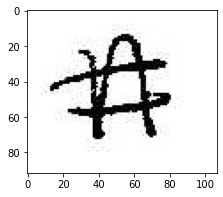

In [8]:
zipped_data = h5.File(f"{dest_dir}/spanish.h5", "r")

sample_key = list(zipped_data["train"].keys())[-10]
sample_value = zipped_data["train"].get(sample_key)

print("(Training Set) Label:", sample_value.attrs.get("label").decode("utf-8"))

plt.figure(figsize=(5,3))
plt.imshow(sample_value[:], cmap="gray")
plt.show()

zipped_data.close()

## `IAM-word` dataset

A custom dataset of 75602 samples.

In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os

source_dir = "../data-sources/iam-word-dataset"
dest_dir = "../data-sources/minified"

iam_data = pd.read_csv(f"{source_dir}/words.csv", sep=";")
iam_data["word"] = iam_data["word"].apply(str.strip)

print(iam_data.shape)
iam_data.head(2)

(115320, 12)


,id,seg,bin,bb_x,bb_y,bb_w,bb_h,tag,word1,word2,word3,word
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A,NaN,NaN,A
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE,NaN,NaN,MOVE


In [8]:
def id_to_fpath(_id: str):
    form_group, form_id, _, _ = _id.split("-")
    return f"{form_group}/{form_group}-{form_id}/{_id}.png"
    
iam_data["fpath"] = iam_data["id"].apply(id_to_fpath)
iam_data["line_id"] = iam_data["id"].apply(lambda x: x[:-3])

print(iam_data.shape)
iam_data.head(2)

(115320, 14)


,id,seg,bin,bb_x,bb_y,bb_w,bb_h,tag,word1,word2,word3,word,fpath,line_id
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A,NaN,NaN,A,a01/a01-000u/a01-000u-00-00.png,a01-000u-00
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE,NaN,NaN,MOVE,a01/a01-000u/a01-000u-00-01.png,a01-000u-00


In [9]:
filter_empty_files = iam_data["fpath"].apply(lambda x: os.path.getsize(f"{source_dir}/{x}") > 0)
iam_data = iam_data[filter_empty_files]

print(iam_data.shape)
iam_data.head(2)

(115318, 14)


,id,seg,bin,bb_x,bb_y,bb_w,bb_h,tag,word1,word2,word3,word,fpath,line_id
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A,NaN,NaN,A,a01/a01-000u/a01-000u-00-00.png,a01-000u-00
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE,NaN,NaN,MOVE,a01/a01-000u/a01-000u-00-01.png,a01-000u-00


In [10]:
iam_data["word"].value_counts()

the           5826
,             5570
.             4984
of            3192
to            2651
              ... 
ANY              1
approve          1
Become           1
settling         1
suffocated       1
Name: word, Length: 13528, dtype: int64

### Split into train / test / validation sets

These sets are preset in `.txt` files.

In [11]:
splits_dir = "../data-sources/iam-word-dataset/largeWriterIndependentTextLineRecognitionTask"

train_set_ids = pd.read_csv(f"{splits_dir}/trainset.txt", names=["id"])
test_set_ids = pd.read_csv(f"{splits_dir}/testset.txt", names=["id"])
valid1_set_ids = pd.read_csv(f"{splits_dir}/validationset1.txt", names=["id"])
valid2_set_ids = pd.read_csv(f"{splits_dir}/validationset2.txt", names=["id"])

print(train_set_ids.shape)
train_set_ids.head(2)

(6161, 1)


,id
0,a01-000u-00
1,a01-000u-01


In [12]:
filter_train, filter_test, filter_valid = False, False, False

for _, row in train_set_ids.iterrows():
    filter_train = filter_train | (iam_data["line_id"] == row.id)
    
for _, row in test_set_ids.iterrows():
    filter_test = filter_test | (iam_data["line_id"] == row.id)
    
for _, row in valid1_set_ids.iterrows():
    filter_valid = filter_valid | (iam_data["line_id"] == row.id)
    
for _, row in valid2_set_ids.iterrows():
    filter_valid = filter_valid | (iam_data["line_id"] == row.id)

In [13]:
train_set = iam_data[filter_train]
test_set = iam_data[filter_test]
valid_set = iam_data[filter_valid]

print(train_set.shape, test_set.shape, valid_set.shape)

(53839, 14) (17616, 14) (16465, 14)


Check out this alternative implementation (it's waaaaaaaaaay slower!):

```python
train_data = pd.DataFrame(columns=["fpath", "word"])

for line in train_iam_data:
    subset = iam_data[iam_data["id"].str.contains(line)]
    
    train_data = pd.concat([train_data, subset[["fpath", "word"]]])
    
# CPU Wall time: 5min 39s
```

In [14]:
%%time
from textRecognition import TinyData

TinyData.minify(
    train_set, test_set, valid_set,
    source_dir=source_dir, target_path=f"{dest_dir}/iam.h5",
    name_label="id", x_label="fpath", y_label="word",
    color=False
)

53839it [05:52, 152.73it/s]
17616it [01:50, 159.67it/s]
16465it [01:44, 157.61it/s]

Done


(Test Set) Label: entrance


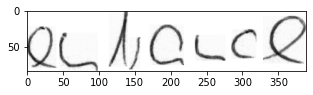

In [43]:
zipped_data = h5.File(f"{dest_dir}/iam.h5", "r")

sample_key = list(zipped_data["test"].keys())[20]
sample_value = zipped_data["test"].get(sample_key)

print("(Test Set) Label:", sample_value.attrs.get("label").decode("utf-8"))

plt.figure(figsize=(5,3))
plt.imshow(sample_value[:], cmap="gray")
plt.show()

zipped_data.close()

## `RIMES2011-word` dataset

+ Dataset of french words with 75602 samples.
+ Predefined train / test / validation splits are defined in `.txt` files.
+ Dataset is already classified into the different splits.

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import os

source_dir = "../data-sources/rimes-words-2011"
dest_dir = "../data-sources/minified"

train_set = pd.read_csv(f"{source_dir}/train_set/groundtruth_training_icdar2011.txt", sep=" ", names=["fpath", "word"])
test_set = pd.read_csv(f"{source_dir}/test_set/grount_truth_test_icdar2011.txt", sep=" ", names=["fpath", "word"])
valid_set = pd.read_csv(f"{source_dir}/valid_set/ground_truth_validation_icdar2011.txt", sep=" ", names=["fpath", "word"])

print("Train:", train_set.shape, "| Test:", test_set.shape, "| Validation:", valid_set.shape)
train_set.head(2)

Train: (51739, 2) | Test: (7776, 2) | Validation: (7464, 2)


,fpath,word
0,lot_1/00001_L/00001_L_0_0.tiff,Suite
1,lot_1/00001_L/00001_L_2_0.tiff,meilleurs


### Removing empty or inexistent files

(148, 327) meilleurs


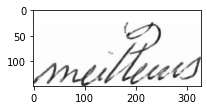

In [16]:
from textRecognition import TinyData
import cv2

image_path = f"{source_dir}/train_set/{train_set.loc[1, 'fpath']}"
image = TinyData.imread(image_path)
                        
print(image.shape, train_set.loc[1, 'word'])
plt.figure(figsize=(3,3))
plt.imshow(image, cmap="gray")

In [17]:
os.path.isfile(f"{source_dir}/train_set/{train_set.loc[0, 'fpath']}")

False

In [18]:
def non_empty_file(fpath):
    """Filter out files that don't exist or are empty"""
    if os.path.isfile(fpath):
        return os.path.getsize(fpath) > 0
    else:
        return False

filter_empty_files = train_set["fpath"].apply(lambda x: non_empty_file(f"{source_dir}/train_set/{x}"))
train_set = train_set[filter_empty_files]

filter_empty_files = test_set["fpath"].apply(lambda x: non_empty_file(f"{source_dir}/test_set/{x}"))
test_set = test_set[filter_empty_files]

filter_empty_files = valid_set["fpath"].apply(lambda x: non_empty_file(f"{source_dir}/valid_set/{x}"))
valid_set = valid_set[filter_empty_files]

print("Train:", train_set.shape, "| Test:", test_set.shape, "| Validation:", valid_set.shape)

Train: (51738, 2) | Test: (7776, 2) | Validation: (7464, 2)


In [19]:
train_set["name"] = train_set["fpath"].apply(lambda x: x.replace(".tiff", "").split("/")[-1])
test_set["name"] = test_set["fpath"].apply(lambda x: x.replace(".tiff", "").split("/")[-1])
valid_set["name"] = valid_set["fpath"].apply(lambda x: x.replace(".tiff", "").split("/")[-1])

valid_set.head(2)

,fpath,word,name
0,lot_14/01351_L/01351_L_0_0.tiff,Lors,01351_L_0_0
1,lot_14/01351_L/01351_L_0_1.tiff,de,01351_L_0_1


In [20]:
%%time
from textRecognition import TinyData

# I temporarily created a folder "all_sets" and moved there all image folders - instead of modifying the package :\/
TinyData.minify(
    train_set, test_set, valid_set,
    source_dir=f"{source_dir}/all_sets", target_path=f"{dest_dir}/rimes2011.h5",
    name_label="name", x_label="fpath", y_label="word",
    color=False
)

51738it [07:14, 119.05it/s]
7776it [01:16, 102.19it/s]
7464it [00:49, 150.89it/s]


Done
Wall time: 9min 20s


In [29]:
zipped_data["valid"][sample_key].attrs["label"]

b'Lors'

(Validation Set) Label: de


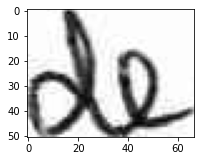

In [33]:
zipped_data = h5.File(f"{dest_dir}/rimes2011.h5", "r")

sample_key = list(zipped_data["valid"].keys())[1]
sample_value = zipped_data["valid"].get(sample_key)

print("(Validation Set) Label:", sample_value.attrs.get("label").decode("utf-8"))

plt.figure(figsize=(3,3))
plt.imshow(sample_value[:], cmap="gray")
plt.show()

zipped_data.close()